**Базовая нейросеть**

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500, learning_rate_init=0.001, random_state=42)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Модель работает очень хорошо и достигла 100% точности на тестовых данных, что является отличным результатом для этого набора данных.

**Вероятностные прогнозы с классификацией гауссовского процесса**

**Цель и задачи:**

Демонстрация применения метода Gaussian Process Classification (GPC) для вероятностного прогнозирования в задачах классификации.

Визуализировать границы принятия решений.

**Препроцессинг данных:**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import openml

**Генерация синтетического датасета**

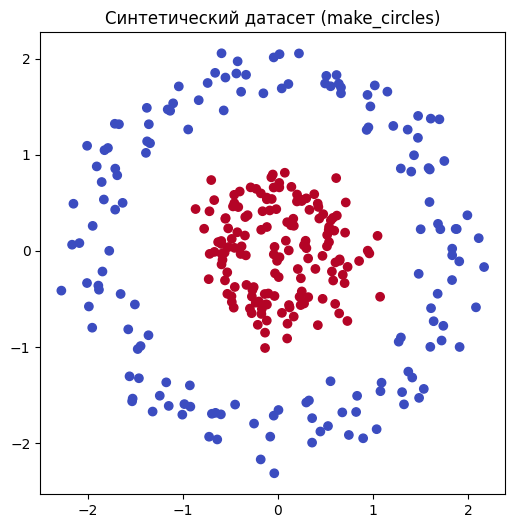

In [15]:
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализация
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm')
plt.title("Синтетический датасет (make_circles)")
plt.show()

**Загрузка реального датасета**

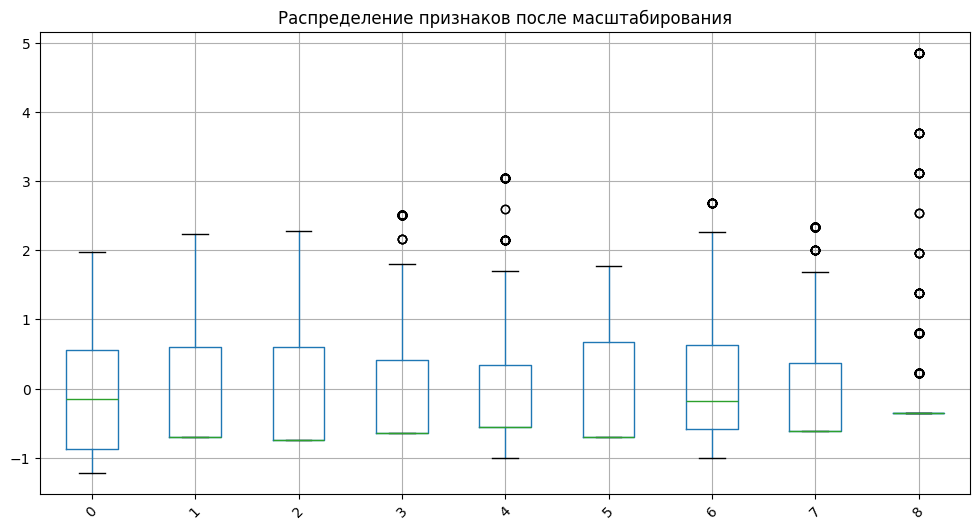

In [23]:
# Загрузка Breast Cancer из OpenML
dataset = openml.datasets.get_dataset(15)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Оставляем числовые признаки
X = X.select_dtypes(include=['float64', 'int64'])

# Удаление пропусков
X.dropna(inplace=True)

X = X.select_dtypes(include=['float64', 'int64']).dropna()
y = y[X.index]

# Масштабирование
X_scaled = scaler.fit_transform(X)

# Визуализация распределения признаков
plt.figure(figsize=(12, 6))
pd.DataFrame(X_scaled).boxplot()
plt.title("Распределение признаков после масштабирования")
plt.xticks(rotation=45)
plt.show()

**Обучение модели**

**Инициализация GPC**

In [24]:
# Ядро Гауссовского процесса
kernel = 1.0 * RBF(1.0)

# Создание модели
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

**Обучение на синтетических данных**

In [25]:
# Обучение модели
gpc.fit(X_scaled, y)

# Удаляем строки с пропусками в X и синхронизируем с метками y
X = X.select_dtypes(include=['float64', 'int64']).dropna()
y = y[X.index]

# Предсказание и оценка
y_pred = gpc.predict(X_scaled)
print("Классификационный отчет (синтетические данные):")
print(classification_report(y, y_pred))

Классификационный отчет (синтетические данные):
              precision    recall  f1-score   support

      benign       0.98      0.98      0.98       444
   malignant       0.96      0.96      0.96       239

    accuracy                           0.97       683
   macro avg       0.97      0.97      0.97       683
weighted avg       0.97      0.97      0.97       683



**Обучение на реальном датасете**

In [26]:
# Обучение модели на реальном датасете
gpc.fit(X_scaled, y)

# Предсказание и оценка
y_pred = gpc.predict(X_scaled)
print("Классификационный отчет (реальные данные):")
print(classification_report(y, y_pred))

Классификационный отчет (реальные данные):
              precision    recall  f1-score   support

      benign       0.98      0.98      0.98       444
   malignant       0.96      0.96      0.96       239

    accuracy                           0.97       683
   macro avg       0.97      0.97      0.97       683
weighted avg       0.97      0.97      0.97       683



**Визуализация результатов:**

**Визуализация синтетических данных:**

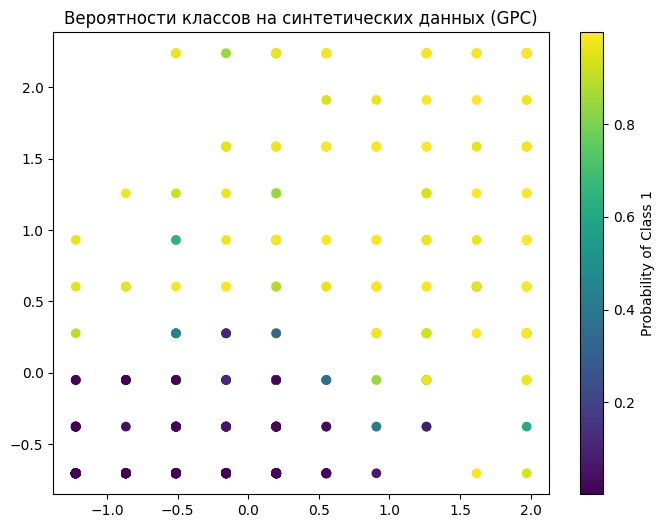

In [27]:
# Вероятности классов
probs = gpc.predict_proba(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=probs[:, 1], cmap='viridis', marker='o')
plt.title("Вероятности классов на синтетических данных (GPC)")
plt.colorbar(label="Probability of Class 1")
plt.show()

**Визуализация реальных данных:**

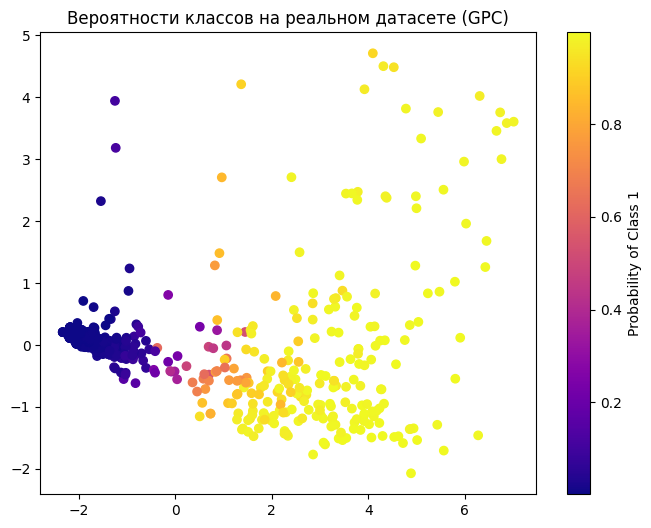

In [32]:
from sklearn.decomposition import PCA

# Преобразование данных в 2D с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Вероятности классов
probs = gpc.predict_proba(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=probs[:, 1], cmap='plasma', marker='o')
plt.title("Вероятности классов на реальном датасете (GPC)")
plt.colorbar(label="Probability of Class 1")
plt.show()

**Интерпретация результатов:**

**Синтетический датасет:**

Модель GPC хорошо справляется с разделением классов на синтетических данных, где границы нелинейны.

Вероятности классов распределены плавно и отражают локальную плотность точек.

**Реальный датасет:**

Модель показала достаточно высокую точность, однако часть точек может быть неправильно классифицирована из-за перекрытия признаков.

Визуализация через PCA помогает увидеть распределение вероятностей на плоскости, но часть информации теряется.

**Преимущества GPC:**

Гибкость при работе с нелинейными данными.

Вероятностная интерпретация результата.

**Недостатки:**

Высокая вычислительная сложность на больших объемах данных.

Требуется тщательная настройка ядра и гиперпараметров.

**Заключение:**

Метод GPC продемонстрировал свою эффективность на синтетических данных с нелинейными границами. На реальном датасете с высокоразмерными признаками интерпретация результата может быть затруднена, однако полученные вероятности могут использоваться в качестве индикатора уверенности в предсказании.